# k-armed bandit problem
### part 1 from the harderchoices.com blog

https://harderchoices.com/2018/01/20/rl-basics-and-simple-k-armed-bandit-problem/

In [39]:
%matplotlib inline

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
def generate_problem(k=10):
    return np.random.normal(loc=0.0, scale=1, size=k)

def generate_reward(problem, action):
    return np.random.normal(loc=problem[action], scale=1)

In [12]:
def k_bandit(problem, k, steps, exploration_rate, verbose=True, record_rewards=True):
    Q = {i: 0 for i in range(k)} # value function
    N = {i: 0 for i in range(k)} # number of actions, for update rule
    
    r = []
    
    for i in range(steps):
        if (random.uniform(0,1) < exploration_rate):
            #explore via random action
            action = random.randint(0, k-1)
        else:
            #exploit max mean reward
            action = max(Q, key=Q.get)
        
        reward = generate_reward(problem, action) #get reward for current action
        N[action] += 1 #update action counter
        Q[action] += (1 / N[action]) * (reward - Q[action]) #update value dict
        
        if verbose == True:
            print 'step #' + str(i+1)
            print N
            print Q
            print
        
        if record_rewards == True:
            r.append(reward)
        
    
    if record_rewards == True:
        return r

# test
k = 10
k_bandit(generate_problem(k), k, 5, .1, True, True)

step #1
{0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
{0: -1.557104992902074, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

step #2
{0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
{0: -1.557104992902074, 1: -0.4798360946545515, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

step #3
{0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
{0: -1.557104992902074, 1: -0.4798360946545515, 2: 0.6538871714072181, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

step #4
{0: 1, 1: 1, 2: 2, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
{0: -1.557104992902074, 1: -0.4798360946545515, 2: 0.6538871714072181, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

step #5
{0: 1, 1: 1, 2: 3, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
{0: -1.557104992902074, 1: -0.4798360946545515, 2: 0.6538871714072181, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}



[-1.557104992902074,
 -0.4798360946545515,
 0.6538871714072181,
 -0.6306058943114607,
 -1.4261690226593289]

In [43]:
# generate df w/ different explore rates
k = 10
steps = 2000

d = {'l_greedy' : k_bandit(generate_problem(k), k, steps, 0, False, True),\
     'l_1' : k_bandit(generate_problem(k), k, steps, 0.1, False, True),\
     'l_2' : k_bandit(generate_problem(k), k, steps, 0.2, False, True)}

df = pd.DataFrame(data = d)
df.head()

,l_1,l_2,l_greedy
0,0.582139,2.268866,-1.329982
1,-0.732438,2.862093,-1.673450
2,0.680597,2.439514,-1.208293
3,1.096469,3.073178,2.225457
4,-0.395190,3.270405,1.593314


In [44]:
df_expanding_means = df.apply(pd.expanding_mean)
# df_expanding_means['steps'] = df_expanding_means.index + 1

df_expanding_means.head()

,l_1,l_2,l_greedy
0,0.582139,2.268866,-1.329982
1,-0.075150,2.565480,-1.501716
2,0.176766,2.523491,-1.403908
3,0.406692,2.660913,-0.496567
4,0.246315,2.782811,-0.078591


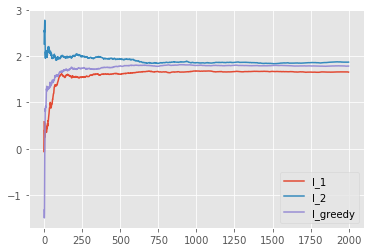

In [46]:
df_expanding_means.plot()

In [50]:
# now lets do that a lot & average!

def generate_simulations(simulations, k = 10, steps = 2000):
    columns = ['l_1', 'l_2', 'l_greedy', 'steps']
    df = pd.DataFrame(columns=columns) 
    
    for i in range(simulations):
        # simulate       
        temp_d = {'l_greedy' : k_bandit(generate_problem(k), k, steps, 0, False, True),\
             'l_1' : k_bandit(generate_problem(k), k, steps, 0.1, False, True),\
             'l_2' : k_bandit(generate_problem(k), k, steps, 0.2, False, True)}
        temp_df = pd.DataFrame(data = temp_d)
        temp_df = temp_df.apply(pd.expanding_mean)
        temp_df['steps'] = temp_df.index + 1
        temp_df['simulation_id'] = i

        # union with df
        df = pd.concat([df, temp_df])
    
    return df

#test
sims_df = generate_simulations(1000)
sims_df.head()

,l_1,l_2,l_greedy,simulation_id,steps
0,-1.428781,-1.571918,0.344691,0.0,1
1,-0.837828,-0.772555,1.154137,0.0,2
2,0.093996,-0.887923,1.219219,0.0,3
3,0.235925,-0.580287,1.303360,0.0,4
4,0.485583,-0.383853,1.083185,0.0,5


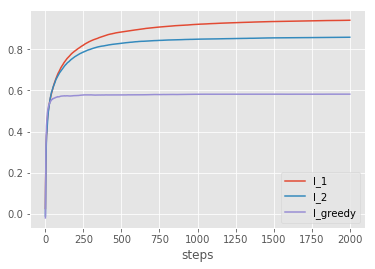

In [55]:
sims_df.groupby(['steps'])['l_1', 'l_2', 'l_greedy'].mean().plot()